In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:/Users/mail2/OneDrive/Desktop/Ml_Data/Social_Network_Ads.csv")

In [3]:
data=data.drop(["User ID"],axis=1)

In [4]:
data.head(1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0


In [5]:
#Mapping

In [6]:
data["Gender"]=data["Gender"].map({"Male":0,"Female":1})

In [10]:
#data.head(1)

In [8]:
data["Purchased"]=data["Purchased"].map({0:"NotPurchased",1:"Purchased"})

In [11]:
#sb.countplot("Purchased",data=data)
#plt.show()

In [12]:
#split the data into feature and target

In [15]:
X_GAS=data.iloc[:,0:3]
Y_pursched=data.iloc[:,3]

In [17]:
#X_GAS
#Y_pursched

In [18]:
#training and testing 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_GAS,Y_pursched,test_size=.30,random_state=101)

In [24]:
Xtrain.shape

(280, 3)

In [30]:
#Ytrain.value_counts()

In [31]:
#Ytest.value_counts()

In [37]:
from sklearn.tree import DecisionTreeClassifier
from time import time

In [43]:
st=time()
dt_model=DecisionTreeClassifier(criterion="entropy",splitter="best")
dt_learner=dt_model.fit(Xtrain,Ytrain)
et=time()
total_time=et-st
print("Toatl time for training ",total_time)

Toatl time for training  0.0036084651947021484


In [44]:
#Prediction

In [46]:
YP=dt_learner.predict(Xtest)
YA=Ytest
accuracy_score(YP,YA)*100

85.83333333333333

In [48]:
dt_learner.feature_importances_

array([0.01941206, 0.49229072, 0.48829723])

In [49]:
dt_learner.classes_

array(['NotPurchased', 'Purchased'], dtype=object)

In [53]:
#TPR,FNR

In [54]:
C_R=classification_report(YA,YP)

In [69]:
#print(C_R)

In [62]:
cf=confusion_matrix(YA,YP,labels=dt_model.classes_)

In [64]:
#print(cf)

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

In [67]:
discm=ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=dt_model.classes_)

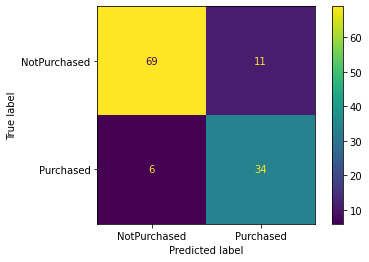

In [68]:
discm.plot()
plt.show()